In [1]:
import pandas as pd
import numpy as np
from math import sqrt

import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import kurtosis, skew

from sklearn.linear_model    import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model    import RidgeCV
from sklearn.pipeline        import make_pipeline
from sklearn.preprocessing   import PolynomialFeatures
from sklearn.model_selection import KFold
from sklearn.preprocessing   import StandardScaler
from sklearn.metrics         import mean_squared_error
from sklearn.linear_model    import Lasso
from sklearn                 import linear_model

In [56]:
women100 = pd.read_csv("100_Women_Results.csv")
y = women100['Sr_PR']
X = women100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [48]:
# add a PR11**2 and PR10**2 term to linear regression
X3_train = X_train.copy()
X3_train['PR11squared'] = X_train['Jr_PR']**2
X3_train['PR10squared'] = X_train['So_PR']**2
X3_train['PR9squared'] = X_train['Fr_PR']**2

X3_test = X_test.copy()
X3_test['PR11squared'] = X_test['Jr_PR']**2
X3_test['PR10squared'] = X_test['So_PR']**2
X3_test['PR9squared'] = X_test['Fr_PR']**2


# Create an empty model
lr = LinearRegression()

lr.fit(X3_train,y_train)

print('Using squared terms as well to predict 12th grade PR')
print('Train R^2: ',lr.score(X3_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X3_train))))
print('Test R^2: ', lr.score(X3_test, y_test))
print('Test RMSE:', 
      sqrt(mean_squared_error(y_test, lr.predict(X3_test))))

Using squared terms as well to predict 12th grade PR
Train R^2:  0.7759678170546922
Train RMSE: 0.23932482657548687
Test R^2:  0.8303577007649015
Test RMSE: 0.22603488686065284


In [3]:
y.head()

0    11.81
1    12.02
2    12.17
3    12.58
4    11.28
Name: Sr_PR, dtype: float64

In [4]:
X.head()

,Fr_PR,So_PR,Jr_PR
0,11.78,11.81,11.78
1,11.34,11.42,11.30
2,11.74,11.72,11.58
3,12.34,12.76,12.43
4,11.29,11.22,11.27


In [50]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

In [51]:
# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

0.7908751110452594

In [52]:
y_pred = lr.predict(X_test)

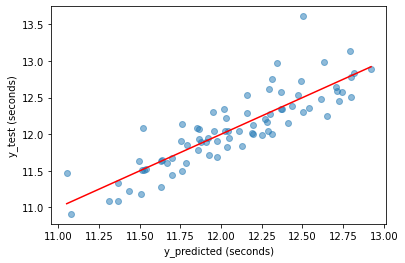

In [53]:
plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

In [17]:
print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.7931694555421639
Train RMSE: 0.23370211670524965
Test R^2:  0.7407713018037778
Test RMSE: 0.25679771093272735
Skew: 0.5519249155438655
mean :  0.05243584505118523
var  :  0.0631955464940567
skew :  0.5519249155438655
kurt :  0.2724065304751142


In [35]:
X.head()

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

X_test.head()

,Fr_PR
333,11.70
250,11.58
196,11.96
138,11.30
14,11.77


Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.5868480494438556
Train RMSE: 0.33855646832731934
Test R^2:  0.6022892990419447
Test RMSE: 0.26671361190786813
Skew: 0.28811036663204276
mean :  0.05788857780961889
var  :  0.0677850633361206
skew :  0.28811036663204276
kurt :  0.5017940579848115


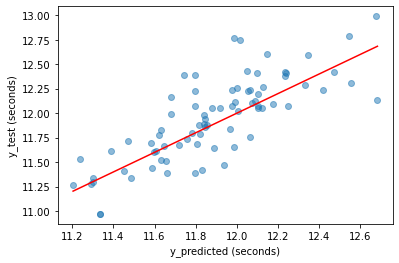

In [57]:
del X['So_PR']
del X['Jr_PR']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))


In [7]:
Men100 = pd.read_csv("100_Men_Results.csv")
y = Men100['Sr_PR']
X = Men100
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.7419801034007343
Train RMSE: 0.2135689262120713
Test R^2:  0.6108606521714488
Test RMSE: 0.2616214917112457
Skew: -2.424417400981702
mean :  -0.005283070713874582
var  :  0.06841789408904964
skew :  -2.424417400981702
kurt :  12.788486708388811


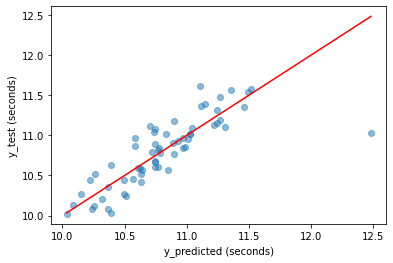

In [8]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

In [13]:
Women5000 = pd.read_csv("5000_Women_Results.csv")
y = Women5000['Sr_PR']
X = Women5000
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.6901142980987565
Train RMSE: 25.52890389196401
Test R^2:  0.5718544683752177
Test RMSE: 29.07109683062551
Skew: 0.5656310562828765
mean :  3.9539946384540614
var  :  829.4945973346814
skew :  0.5656310562828765
kurt :  0.9758497641084136


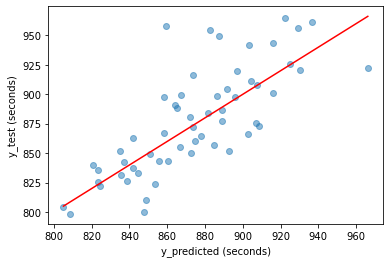

In [21]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

y_pred = lr.predict(X_test)

# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

In [19]:
Men5000 = pd.read_csv("5000_Men_Results.csv")
y = Men5000['Sr_PR']
X = Men5000
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.6546667836592059
Train RMSE: 25.03239938687941
Test R^2:  0.6952816204395357
Test RMSE: 32.18919954511022
Skew: 0.49893981448703456
mean :  11.474355005463048
var  :  904.4837445635291
skew :  0.49893981448703456
kurt :  -0.2037089075868086


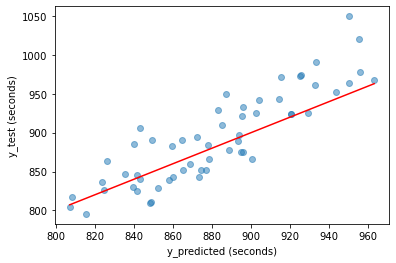

In [22]:
X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.97317486157135
Train RMSE: 0.2479557529141452
Test R^2:  0.6768911795485364
Test RMSE: 0.19304368751638476
Skew: -0.39397950058691766
mean :  -0.012928526553186154
var  :  0.037098718491087174
skew :  -0.39397950058691766
kurt :  -0.1996099350191809


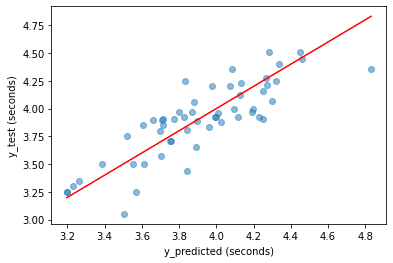

In [25]:
Men5000 = pd.read_csv("PV_Women_Results.csv")
y = Men5000['Sr_PR']
X = Men5000
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.9872652961351104
Train RMSE: 0.20393896047208893
Test R^2:  0.8607949520115863
Test RMSE: 0.16128726150033582
Skew: 0.11621254044316683
mean :  -0.019477078531257498
var  :  0.02563422413416494
skew :  0.11621254044316683
kurt :  0.08234472062041887


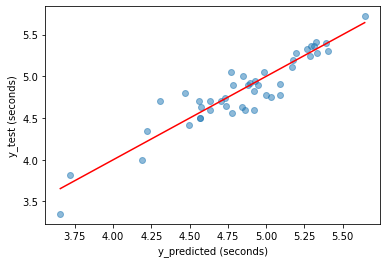

In [55]:
MenPV = pd.read_csv("PV_Men_Results.csv")
y = MenPV['Sr_PR']
X = MenPV
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.9659565555178518
Train RMSE: 0.46082634908924824
Test R^2:  0.6498990543849741
Test RMSE: 0.47580862562541376
Skew: 0.5396379274525713
mean :  0.03409978964420629
var  :  0.225231052565766
skew :  0.5396379274525713
kurt :  0.34814338747920637


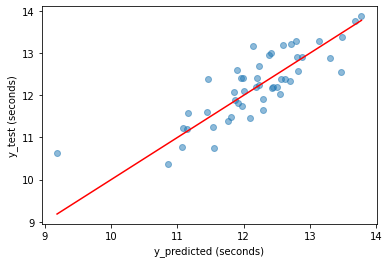

In [64]:
WTJ = pd.read_csv("TJ_Women_Results.csv")
y = WTJ['Sr_PR']
X = WTJ
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))

Using all data (9th, 10th & 11th grades) to predict 12th grade PR
Train R^2:  0.9864519553612366
Train RMSE: 0.582149135592997
Test R^2:  0.5700500601526626
Test RMSE: 0.6477071422582599
Skew: 0.5200071216819225
mean :  -0.20520561120353836
var  :  0.37741519926294387
skew :  0.5200071216819225
kurt :  1.2889696551633465


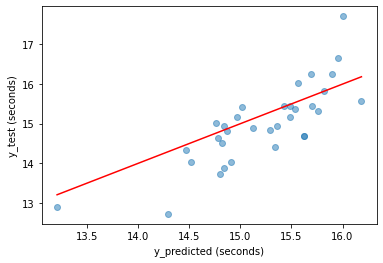

In [70]:
MTJ = pd.read_csv("TJ_Men_Results.csv")
y = MTJ['Sr_PR']
X = MTJ
del X['Sr_PR']
del X['ID']
del X['Name']
del X['School_ID']
del X['School']
del X['Division']
del X['Grad_Yr']
del X['Unnamed: 0']

X_train,X_test, y_train, y_test = train_test_split(X, y, test_size=0.15)

# Create an empty model
lr = LinearRegression()

# Fit the model to the full dataset
lr.fit(X_train, y_train)

# Print out the R^2 for the model against the full dataset
lr.score(X_train,y_train)

y_pred = lr.predict(X_test)

plt.scatter(y_pred,y_test,alpha=0.5);
plt.ylabel('y_test (seconds)');
plt.xlabel('y_predicted (seconds)');

plt.plot([max(y_pred),min(y_pred)],[max(y_pred),min(y_pred)],color='r')
#plt.plot([240,470],[240,470],color='r')

#plt.savefig('test_vs_pred.png');

print('Using all data (9th, 10th & 11th grades) to predict 12th grade PR')
print('Train R^2: ',lr.score(X_train, y_train))
print('Train RMSE:', 
      sqrt(mean_squared_error(y_train, lr.predict(X_train))))
print('Test R^2: ', lr.score(X_test, y_test))
print('Test RMSE:', 
        sqrt(mean_squared_error(y_test, lr.predict(X_test))))

data = y_test-lr.predict(X_test)
print('Skew:',skew(data))
print("mean : ", np.mean(data))
print("var  : ", np.var(data))
print("skew : ",skew(data))
print("kurt : ",kurtosis(data))